<a href="https://colab.research.google.com/github/NickolasFerraz1/GS-Front/blob/main/GS_Front.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installs e Imports

In [1]:
import os
import pandas as pd
from datetime import date
import numpy as np

## Data Loading

In [39]:
df = pd.read_csv('/content/incendios.csv')

In [40]:
df.head(-1)

,ID,data_hora,latitude,longitude,intensidade_fogo_frp,confianca,tipo_uso_solo,temperatura_c,umidade_percentual,velocidade_vento_kmh
0,13222,2021-01-04 04:05:49.528812230,-31.922594,-40.417395,184.544183,0.790850,floresta,24.988587,42.734039,18.679826
1,14215,2015-08-06 05:46:28.718448669,-5.372404,-66.731590,111.975245,0.672174,savana,24.477125,35.884609,16.422620
2,12539,2017-07-02 11:53:18.737280190,2.396042,-36.853160,80.078001,0.612301,savana,20.916811,35.385597,24.534313
3,15906,2012-10-10 23:21:22.540065929,-23.322277,-56.140426,166.950002,0.530149,savana,35.022549,36.932666,2.376626
4,15731,2022-07-28 17:24:33.421018183,-26.739216,-42.100431,248.117133,0.587304,savana,29.832179,65.226605,22.699202
...,...,...,...,...,...,...,...,...,...,...
1094,11996,2021-11-10 19:04:08.788665175,-21.697432,-71.070331,382.241332,0.991443,agricola,22.422463,25.466044,11.782053
1095,13311,2014-05-28 07:32:18.616066068,-21.486772,-68.582403,86.487251,0.586379,savana,26.164292,30.992752,6.130630
1096,17557,2011-12-25 06:24:43.724100694,-6.170654,-53.759334,319.956290,0.589963,savana,28.930925,54.235962,0.437445
1097,14036,2024-10-22 23:21:32.476654530,-4.021738,-57.682926,59.088321,0.806205,pastagem,36.287244,63.042951,16.633894


## Data Cleaning
Drop da feature ID por ser um identificador

In [43]:
df.drop(['ID'],axis = 1, inplace = True, errors = 'ignore')
df.shape

(1100, 9)

In [44]:
df.head()

,data_hora,latitude,longitude,intensidade_fogo_frp,confianca,tipo_uso_solo,temperatura_c,umidade_percentual,velocidade_vento_kmh
0,2021-01-04 04:05:49.528812230,-31.922594,-40.417395,184.544183,0.790850,floresta,24.988587,42.734039,18.679826
1,2015-08-06 05:46:28.718448669,-5.372404,-66.731590,111.975245,0.672174,savana,24.477125,35.884609,16.422620
2,2017-07-02 11:53:18.737280190,2.396042,-36.853160,80.078001,0.612301,savana,20.916811,35.385597,24.534313
3,2012-10-10 23:21:22.540065929,-23.322277,-56.140426,166.950002,0.530149,savana,35.022549,36.932666,2.376626
4,2022-07-28 17:24:33.421018183,-26.739216,-42.100431,248.117133,0.587304,savana,29.832179,65.226605,22.699202


In [45]:
# Converter tipo de solo em números (0/1)
df = pd.get_dummies(df, columns=['tipo_uso_solo'], drop_first=True)


In [46]:
df.head()

,data_hora,latitude,longitude,intensidade_fogo_frp,confianca,temperatura_c,umidade_percentual,velocidade_vento_kmh,tipo_uso_solo_floresta,tipo_uso_solo_pastagem,tipo_uso_solo_savana
0,2021-01-04 04:05:49.528812230,-31.922594,-40.417395,184.544183,0.790850,24.988587,42.734039,18.679826,1,0,0
1,2015-08-06 05:46:28.718448669,-5.372404,-66.731590,111.975245,0.672174,24.477125,35.884609,16.422620,0,0,1
2,2017-07-02 11:53:18.737280190,2.396042,-36.853160,80.078001,0.612301,20.916811,35.385597,24.534313,0,0,1
3,2012-10-10 23:21:22.540065929,-23.322277,-56.140426,166.950002,0.530149,35.022549,36.932666,2.376626,0,0,1
4,2022-07-28 17:24:33.421018183,-26.739216,-42.100431,248.117133,0.587304,29.832179,65.226605,22.699202,0,0,1


Dropando as variáveis:


*   latitude
*   longitude

Todas  não tem valor muito significativo, tanto para análise descritiva, quanto para o modelo



In [47]:
df.drop(['latitude', 'longitude'],axis = 1, inplace = True, errors = 'ignore')
df.shape

(1100, 9)

In [48]:
df.head()

,data_hora,intensidade_fogo_frp,confianca,temperatura_c,umidade_percentual,velocidade_vento_kmh,tipo_uso_solo_floresta,tipo_uso_solo_pastagem,tipo_uso_solo_savana
0,2021-01-04 04:05:49.528812230,184.544183,0.790850,24.988587,42.734039,18.679826,1,0,0
1,2015-08-06 05:46:28.718448669,111.975245,0.672174,24.477125,35.884609,16.422620,0,0,1
2,2017-07-02 11:53:18.737280190,80.078001,0.612301,20.916811,35.385597,24.534313,0,0,1
3,2012-10-10 23:21:22.540065929,166.950002,0.530149,35.022549,36.932666,2.376626,0,0,1
4,2022-07-28 17:24:33.421018183,248.117133,0.587304,29.832179,65.226605,22.699202,0,0,1


## Removendo Outliers
Criando uma função para remover outliers

In [52]:
import pandas as pd

# Seleciona apenas colunas numéricas
colunas_numericas = df.select_dtypes(include='number').columns
df_filtrado = df.copy()

for coluna in colunas_numericas:
    Q1 = df_filtrado[coluna].quantile(0.25)
    Q3 = df_filtrado[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_filtrado = df_filtrado[(df_filtrado[coluna] >= limite_inferior) & (df_filtrado[coluna] <= limite_superior)]

df = df_filtrado


## Features com valores unicos
Verificando a existência de features com valores únicos (vamos dropar pais e mês, pois só temos 1)

In [53]:
df.nunique().sort_values()

,0
tipo_uso_solo_pastagem,1
tipo_uso_solo_floresta,2
tipo_uso_solo_savana,2
data_hora,842
intensidade_fogo_frp,842
confianca,842
temperatura_c,842
umidade_percentual,842
velocidade_vento_kmh,842


In [55]:
df.head()

,data_hora,intensidade_fogo_frp,confianca,temperatura_c,umidade_percentual,velocidade_vento_kmh,tipo_uso_solo_floresta,tipo_uso_solo_pastagem,tipo_uso_solo_savana
0,2021-01-04 04:05:49.528812230,184.544183,0.790850,24.988587,42.734039,18.679826,1,0,0
1,2015-08-06 05:46:28.718448669,111.975245,0.672174,24.477125,35.884609,16.422620,0,0,1
2,2017-07-02 11:53:18.737280190,80.078001,0.612301,20.916811,35.385597,24.534313,0,0,1
3,2012-10-10 23:21:22.540065929,166.950002,0.530149,35.022549,36.932666,2.376626,0,0,1
4,2022-07-28 17:24:33.421018183,248.117133,0.587304,29.832179,65.226605,22.699202,0,0,1


## Verificando dados Nulos

In [56]:
df.isna().sum()

,0
data_hora,0
intensidade_fogo_frp,0
confianca,0
temperatura_c,0
umidade_percentual,0
velocidade_vento_kmh,0
tipo_uso_solo_floresta,0
tipo_uso_solo_pastagem,0
tipo_uso_solo_savana,0


## Ajuste dos Dtypes

In [58]:
df.dtypes


,0
data_hora,object
intensidade_fogo_frp,float64
confianca,float64
temperatura_c,float64
umidade_percentual,float64
velocidade_vento_kmh,float64
tipo_uso_solo_floresta,uint8
tipo_uso_solo_pastagem,uint8
tipo_uso_solo_savana,uint8


In [59]:
df.head()

,data_hora,intensidade_fogo_frp,confianca,temperatura_c,umidade_percentual,velocidade_vento_kmh,tipo_uso_solo_floresta,tipo_uso_solo_pastagem,tipo_uso_solo_savana
0,2021-01-04 04:05:49.528812230,184.544183,0.790850,24.988587,42.734039,18.679826,1,0,0
1,2015-08-06 05:46:28.718448669,111.975245,0.672174,24.477125,35.884609,16.422620,0,0,1
2,2017-07-02 11:53:18.737280190,80.078001,0.612301,20.916811,35.385597,24.534313,0,0,1
3,2012-10-10 23:21:22.540065929,166.950002,0.530149,35.022549,36.932666,2.376626,0,0,1
4,2022-07-28 17:24:33.421018183,248.117133,0.587304,29.832179,65.226605,22.699202,0,0,1


In [60]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 1099
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_hora               842 non-null    object 
 1   intensidade_fogo_frp    842 non-null    float64
 2   confianca               842 non-null    float64
 3   temperatura_c           842 non-null    float64
 4   umidade_percentual      842 non-null    float64
 5   velocidade_vento_kmh    842 non-null    float64
 6   tipo_uso_solo_floresta  842 non-null    uint8  
 7   tipo_uso_solo_pastagem  842 non-null    uint8  
 8   tipo_uso_solo_savana    842 non-null    uint8  
dtypes: float64(5), object(1), uint8(3)
memory usage: 80.8+ KB


In [63]:
df['data_hora'] = pd.to_datetime(df['data_hora'], errors='coerce')
df['horario'] = df['data_hora'].dt.hour


In [66]:
df.drop('data_hora',axis = 1, inplace = True, errors = 'ignore')
df.shape

(842, 9)

In [67]:
df.head(-1)

,intensidade_fogo_frp,confianca,temperatura_c,umidade_percentual,velocidade_vento_kmh,tipo_uso_solo_floresta,tipo_uso_solo_pastagem,tipo_uso_solo_savana,horario
0,184.544183,0.790850,24.988587,42.734039,18.679826,1,0,0,4
1,111.975245,0.672174,24.477125,35.884609,16.422620,0,0,1,5
2,80.078001,0.612301,20.916811,35.385597,24.534313,0,0,1,11
3,166.950002,0.530149,35.022549,36.932666,2.376626,0,0,1,23
4,248.117133,0.587304,29.832179,65.226605,22.699202,0,0,1,17
...,...,...,...,...,...,...,...,...,...
1092,81.733845,0.590593,35.810358,23.123925,18.842356,0,0,0,13
1093,76.683048,0.667832,22.120364,63.982543,7.287935,0,0,1,17
1094,382.241332,0.991443,22.422463,25.466044,11.782053,0,0,0,19
1095,86.487251,0.586379,26.164292,30.992752,6.130630,0,0,1,7


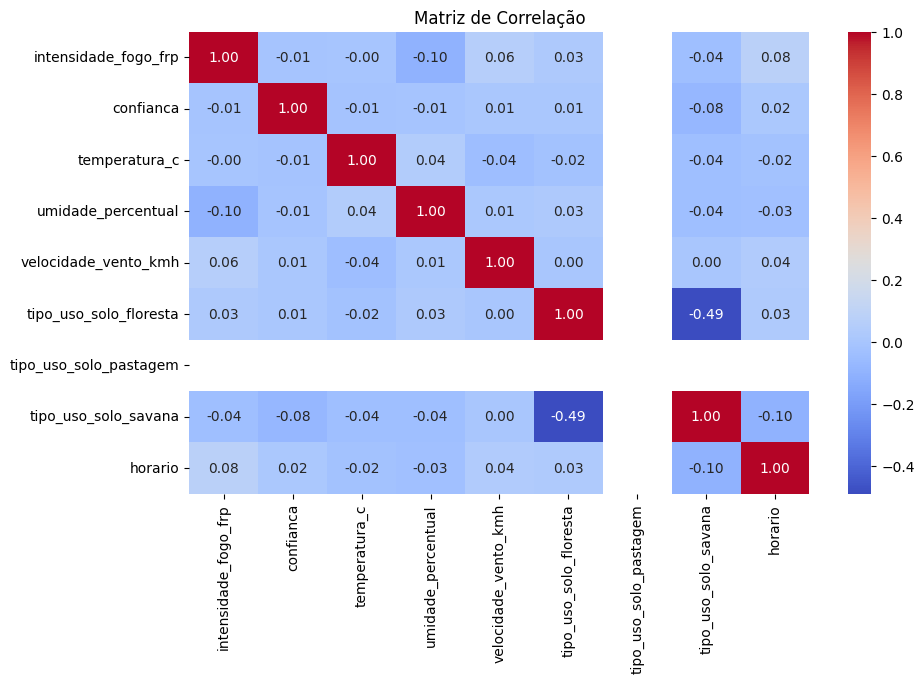

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()



## ML - Regressão Linear

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Variável alvo (y): frp
y = df['intensidade_fogo_frp']

# Variáveis preditoras (X): todas menos 'frp'
X = df.drop('intensidade_fogo_frp', axis=1)


# Dividir em treino e teste (opcional, mas recomendado)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
X_test.to_csv('X_test.csv', index=False)

In [75]:
# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [76]:
# Fazer predições
y_pred = modelo.predict(X_test)

In [83]:
# Avaliar o modelo
print("Coeficiente angular (a):", modelo.coef_[0].round(2))
print("Intercepto (b):", modelo.intercept_.round(2))
print("MSE:", mean_squared_error(y_test, y_pred).round(2))

Coeficiente angular (a): -11.81
Intercepto (b): 288.68
MSE: 20155.02


In [ ]:
import joblib

# Supondo que seu modelo esteja treinado
joblib.dump(modelo, 'modelo_regressao_linear.pkl')
